## Part-of-Speech tagging using CRF

### Data Preparation

In [1]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import sklearn

In [2]:
# reading the Treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [3]:
# first few tagged sentences
print(wsj[:2])
print(len(wsj))

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]
3914


In [4]:
# reading the Brown tagged sentences
brown= list(nltk.corpus.brown.tagged_sents(tagset='universal'))

In [5]:
# first few tagged sentences
print(brown[:2])
print(len(brown))

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

In [6]:
# reading the conll2000 tagged sentences
conll2000= list(nltk.corpus.conll2000.tagged_sents(tagset='universal'))

In [7]:
# first few tagged sentences
print(conll2000[:2])
print(len(conll2000))

[[('Confidence', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('pound', 'NOUN'), ('is', 'VERB'), ('widely', 'ADV'), ('expected', 'VERB'), ('to', 'PRT'), ('take', 'VERB'), ('another', 'DET'), ('sharp', 'ADJ'), ('dive', 'NOUN'), ('if', 'ADP'), ('trade', 'NOUN'), ('figures', 'NOUN'), ('for', 'ADP'), ('September', 'NOUN'), (',', '.'), ('due', 'ADJ'), ('for', 'ADP'), ('release', 'NOUN'), ('tomorrow', 'NOUN'), (',', '.'), ('fail', 'VERB'), ('to', 'PRT'), ('show', 'VERB'), ('a', 'DET'), ('substantial', 'ADJ'), ('improvement', 'NOUN'), ('from', 'ADP'), ('July', 'NOUN'), ('and', 'CONJ'), ('August', 'NOUN'), ("'s", 'PRT'), ('near-record', 'ADJ'), ('deficits', 'NOUN'), ('.', '.')], [('Chancellor', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('Exchequer', 'NOUN'), ('Nigel', 'NOUN'), ('Lawson', 'NOUN'), ("'s", 'PRT'), ('restated', 'VERB'), ('commitment', 'NOUN'), ('to', 'PRT'), ('a', 'DET'), ('firm', 'NOUN'), ('monetary', 'ADJ'), ('policy', 'NOUN'), ('has', 'VERB'), ('helped', 'VERB'), ('to', 'PRT'), ('prev

In [8]:
nltk_data = wsj + brown + conll2000

In [9]:
print(nltk_data[:2])
print(len(nltk_data))

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]
72202


In [10]:
nltk_data[1]

[('Mr.', 'NOUN'),
 ('Vinken', 'NOUN'),
 ('is', 'VERB'),
 ('chairman', 'NOUN'),
 ('of', 'ADP'),
 ('Elsevier', 'NOUN'),
 ('N.V.', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Dutch', 'NOUN'),
 ('publishing', 'VERB'),
 ('group', 'NOUN'),
 ('.', '.')]

In [11]:
#All unique tags
tags=[tags[1] for i in nltk_data for tags in i]

In [12]:
set(tags)#total of 12 available tags

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [13]:
print(nltk_data[0])
print("Tagged sentences: ", len(nltk_data))

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')]
Tagged sentences:  72202


In [14]:
#Building Features
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
    'word': sentence[index],
    'is_first': index == 0,
    'is_last': index == len(sentence) - 1,
    'is_capitalized': sentence[index][0].upper() == sentence[index][0],
    'is_all_caps': sentence[index].upper() == sentence[index],
    'is_all_lower': sentence[index].lower() == sentence[index],
    'prefix-1': sentence[index][0],
    'prefix-2': sentence[index][:2],
    'prefix-3': sentence[index][:3],
    'suffix-1': sentence[index][-1],
    'suffix-2': sentence[index][-2:],
    'suffix-3': sentence[index][-3:],
    'prev_word': '' if index == 0 else sentence[index - 1],
    'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
    'has_hyphen': '-' in sentence[index],
    'is_numeric': sentence[index].isdigit(),
    'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
}
    



### 1. Build your CRF

In [15]:
from nltk.tag.util import untag

In [16]:
#Taking a cutoff for train and test sets
cutoff=round(0.70*len(nltk_data))
training_sentences=nltk_data[:cutoff]
validation_sentences=nltk_data[cutoff:]

In [17]:
print(len(training_sentences))
print(len(validation_sentences))

50541
21661


In [18]:
def transform_to_dataset(nltk_data):
    X, y = [], []
 
    for tagged in nltk_data:
        X.append([features(untag(tagged), index) for index in range(len(tagged))])
        y.append([tag for _, tag in tagged])
 
    return X, y

In [19]:
#Transoforming into dataset
X_train, y_train = transform_to_dataset(training_sentences)
X_valid, y_valid = transform_to_dataset(validation_sentences)

In [20]:
#Testing out a baseline model
from sklearn_crfsuite import CRF
 
model = CRF()
model.fit(X_train, y_train)

CRF(algorithm=None, all_possible_states=None, all_possible_transitions=None,
  averaging=None, c=None, c1=None, c2=None, calibration_candidates=None,
  calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
  gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=None,
  max_linesearch=None, min_freq=None, model_filename=None,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False)

In [21]:
#We have an accuracy of 95%and F1 of 95%
from sklearn_crfsuite import metrics
 
y_pred = model.predict(X_valid)
print(metrics.flat_accuracy_score(y_valid, y_pred))
print(metrics.flat_f1_score(y_valid, y_pred,
                      average='weighted'))

0.9507641768789898
0.9505653683479195


In [22]:
from sklearn_crfsuite import metrics
from sklearn_crfsuite import scorers


#Hyperparameter tuning
# define fixed parameters and parameters to search
crf = CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)

# parameters to tune
params_space = {
    'c1': [0.01, 0.1, 1],
    'c2': [0.01, 0.1, 1]
}

# use the same metric for evaluation
f1_scorer = scorers.make_scorer(metrics.flat_f1_score,
                        average='weighted')

In [23]:
#Gridsearch
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
rs = GridSearchCV(crf, 
                  params_space,
                  cv=3,
                  verbose=1,
                  n_jobs=2,
                  scoring=f1_scorer, 
                  return_train_score=True)
# fit
rs.fit(X_train, y_train)

C:\Users\om.a.prasad.mohanty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\om.a.prasad.mohanty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed: 53.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=CRF(algorithm='lbfgs', all_possible_states=None,
  all_possible_transitions=True, averaging=None, c=None, c1=None, c2=None,
  calibration_candidates=None, calibration_eta=None,
  calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error...e,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'c1': [0.01, 0.1, 1], 'c2': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(flat_f1_score, average=weighted), verbose=1)

In [33]:
#Best estimators
rs.best_estimator_

CRF(algorithm='lbfgs', all_possible_states=None,
  all_possible_transitions=True, averaging=None, c=None, c1=0.1, c2=0.1,
  calibration_candidates=None, calibration_eta=None,
  calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
  gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
  max_linesearch=None, min_freq=None, model_filename=None,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False)

In [24]:
 # store CV results in a DF
cv_results = pd.DataFrame(rs.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_c1,param_c2,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,204.338895,6.703301,0.958412,0.994542,0.01,0.01,"{'c1': 0.01, 'c2': 0.01}",5,0.931051,0.996059,0.972192,0.993709,0.971992,0.993859,12.587556,0.813840,0.019347,0.001074
1,209.291303,6.244936,0.959715,0.992102,0.01,0.1,"{'c1': 0.01, 'c2': 0.1}",2,0.932131,0.994033,0.973647,0.991083,0.973369,0.991189,10.953006,0.482495,0.019506,0.001366
2,210.094359,6.161629,0.956526,0.980204,0.01,1,"{'c1': 0.01, 'c2': 1}",7,0.928419,0.983197,0.970824,0.978419,0.970335,0.978995,9.953389,0.349938,0.019876,0.002130
3,204.521314,6.109545,0.959225,0.994071,0.1,0.01,"{'c1': 0.1, 'c2': 0.01}",3,0.931545,0.995722,0.973220,0.993125,0.972911,0.993367,10.150433,0.410049,0.019573,0.001172
4,210.339025,6.270997,0.959717,0.991167,0.1,0.1,"{'c1': 0.1, 'c2': 0.1}",1,0.931875,0.993223,0.973837,0.990114,0.973439,0.990165,8.809848,0.567188,0.019688,0.001454
5,203.936954,6.552224,0.956350,0.979529,0.1,1,"{'c1': 0.1, 'c2': 1}",8,0.928200,0.982571,0.970736,0.977709,0.970114,0.978307,10.902357,0.540124,0.019907,0.002165
6,207.822181,5.984505,0.958493,0.980890,1,0.01,"{'c1': 1, 'c2': 0.01}",4,0.930352,0.983802,0.972870,0.979079,0.972257,0.979789,13.584966,0.279807,0.019900,0.002079
7,204.590387,6.575710,0.957903,0.979616,1,0.1,"{'c1': 1, 'c2': 0.1}",6,0.929881,0.982606,0.972263,0.977798,0.971566,0.978443,8.719647,0.564679,0.019817,0.002131
8,209.916847,5.932419,0.954268,0.973902,1,1,"{'c1': 1, 'c2': 1}",9,0.926438,0.977044,0.968597,0.971883,0.967768,0.972779,9.132543,0.964420,0.019681,0.002252


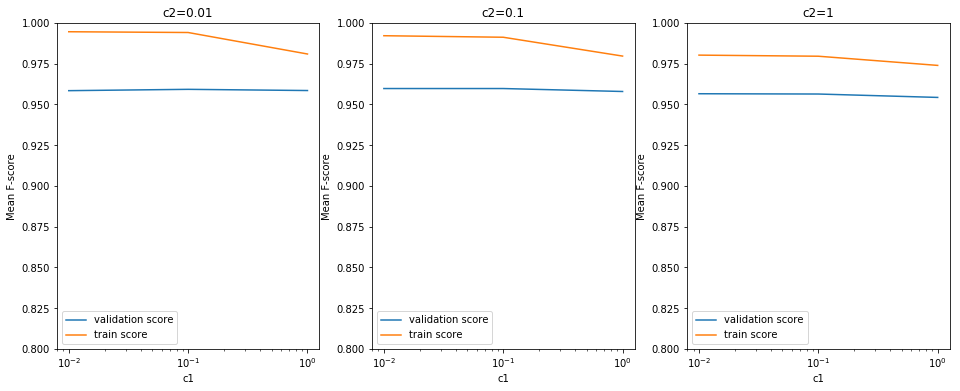

In [35]:
# plotting CV results
# for each value of c2, make a plot of c1 versus train and test f1-score
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))

for i, val in enumerate(params_space['c2']):
   
    # subplot 1/3/i
    plt.subplot(1, 3, i+1)
    c2_subset = cv_results[cv_results['param_c2']==val]

    plt.plot(c2_subset["param_c1"], c2_subset["mean_test_score"])
    plt.plot(c2_subset["param_c1"], c2_subset["mean_train_score"])
    plt.xlabel('c1')
    plt.ylabel('Mean F-score')
    plt.title("c2={0}".format(val))
    plt.ylim([0.80, 1])
    plt.legend(['validation score', 'train score'], loc='lower left')
    plt.xscale('log')

### 2. Evaluate the model performance

In [26]:
#Taking c1=0.1 and c2=0.1
# building a model with optimal hyperparams
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_states=None,
  all_possible_transitions=True, averaging=None, c=None, c1=0.1, c2=0.1,
  calibration_candidates=None, calibration_eta=None,
  calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
  gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
  max_linesearch=None, min_freq=None, model_filename=None,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False)

In [27]:
#checking on the validation set
#Getting a validation score of 95.3% and F1 of 95.3%
y_pred = crf.predict(X_valid)
print(metrics.flat_accuracy_score(y_valid, y_pred))
print(metrics.flat_f1_score(y_valid, y_pred,
                      average='weighted'))

0.9534574344159172
0.9533288025216232


### Converting to pickle file and checking on test set

In [28]:
# save the model to a pickle file
import _pickle as cPickle

with open('Om_Prasad_Mohanty_part_2.pkl', 'wb') as clf:
    try:
        cPickle.dump(crf, clf)
    except Exception as e:
        print(e)
    finally:
        clf.close()   

In [29]:
# load the trained model
import _pickle as cPickle

with open('Om_Prasad_Mohanty_part_2.pkl', 'rb') as fid:
    crf = cPickle.load(fid)

In [30]:
#We can see that unknown words like Android and Google are correctly tagged
sample_sentence="""Android is a mobile operating system developed by Google.
Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.
Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.
Twitter is an online news and social networking service on which users post and interact with messages known as tweets.
Before entering politics, Donald Trump was a domineering businessman and a television personality.
The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.
This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.
Show me the cheapest round trips from Dallas to Atlanta
I would like to see flights from Denver to Philadelphia.
Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.
NASA invited social media users to experience the launch of ICESAT-2 Satellite."""


sentence=sample_sentence.split() 
 
def pos_tag(sentence):
    sentence_features = [features(sentence, index) for index in range(len(sentence))]
    return list(zip(sentence, crf.predict([sentence_features])[0]))
 
print(pos_tag(sentence))  # [('I', 'PRP'), ('am', 'VBP'), ('Bob', 'NNP'), ('!', '.')]

[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'VERB'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google.', 'NOUN'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'NOUN'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013.', 'NOUN'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'DET'), ('gave', 'VERB'), ('Google', 'ADJ'), ('access', 'NOUN'), ('to', 'ADP'), ("Twitter's", 'NOUN'), ('firehose.', 'NOUN'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'ADJ'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), ('users', 'VERB'), ('post', 'NOUN'), ('and', 'CO

### 3. Interpret the model (enlist important state and transition features)

In [31]:
#All important and unimportant transitions
from collections import Counter

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])


Top likely transitions:
X      -> X       6.200858
ADJ    -> NOUN    3.932347
NOUN   -> NOUN    2.525426
NOUN   -> PRON    2.359116
PRT    -> VERB    2.324850
VERB   -> NOUN    2.228564
DET    -> NOUN    2.134866
PRON   -> VERB    1.972256
NOUN   -> VERB    1.869902
ADV    -> ADJ     1.867581
ADP    -> NOUN    1.785454
VERB   -> PRT     1.659098
VERB   -> ADV     1.621209
ADV    -> ADV     1.584325
NOUN   -> ADP     1.387764
DET    -> ADJ     1.297524
NOUN   -> ADV     1.219714
NOUN   -> CONJ    1.177006
NUM    -> NOUN    1.134257
ADJ    -> ADJ     1.128181

Top unlikely transitions:
ADV    -> X       -1.446811
ADP    -> CONJ    -1.496150
NUM    -> ADV     -1.511334
CONJ   -> NUM     -1.511504
X      -> NUM     -1.552134
NUM    -> X       -1.591538
NUM    -> PRON    -1.597260
DET    -> DET     -1.628903
DET    -> .       -1.687558
ADP    -> .       -1.755507
.      -> NUM     -1.769471
NUM    -> DET     -1.788982
DET    -> ADP     -2.234468
DET    -> PRT     -2.354936
DET    -> CONJ   

In [32]:
# important features
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
print_state_features(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(Counter(crf.state_features_).most_common()[-30:])

Top positive:
9.971293 ADJ      word:willing
9.867279 NOUN     word:something
9.261609 ADP      word:concerning
9.197658 NUM      word:million
9.066958 ADV      word:regardless
9.050844 ADJ      word:lonely
8.839735 ADP      word:whether
8.721549 NOUN     word:anything
8.417451 ADJ      word:former
8.414516 NOUN     word:nothing
8.400676 VERB     word:been
8.302120 ADJ      word:short
8.300928 ADJ      word:same
7.872745 NOUN     word:ally
7.841459 ADP      word:under
7.840950 ADJ      word:lovely
7.800880 ADJ      word:interesting
7.783747 ADJ      word:Many
7.774975 NOUN     word:interest
7.771090 ADP      word:between
7.689002 ADJ      suffix-3:ous
7.526612 NOUN     word:belly
7.454743 DET      word:some
7.417559 VERB     word:heard
7.387223 X        prefix-1:*
7.373692 ADV      word:instead
7.363266 NOUN     word:thing
7.349165 VERB     word:consists
7.338026 ADJ      word:charming
7.283073 ADJ      word:strange

Top negative:
-3.821861 NOUN     prefix-3:Alo
-3.827270 VERB     is_a